In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [160]:
data = pd.read_csv('C:\\Users\\cwins\\Downloads\\zero-to-mastery-ml-masterUNZIPPED\\zero-to-mastery-ml-master\\Ecommerce_Customers.csv')

In [161]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.49727,12.65565,39.57767,4.08262,587.95105
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.92627,11.10946,37.26896,2.66403,392.20493
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.00091,11.33028,37.11060,4.10454,487.54750
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.30556,13.71751,36.72128,3.12018,581.85234
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.33067,12.79519,37.53665,4.44631,599.40609


In [162]:
# Checking for missing values
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [163]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.00000,500.00000,500.00000,500.00000,500.00000
mean,33.05319,12.05249,37.06045,3.53346,499.31404
std,0.99256,0.99422,1.01049,0.99928,79.31478
min,29.53243,8.50815,33.91385,0.26990,256.67058
25%,32.34182,11.38815,36.34926,2.93045,445.03828
50%,33.08201,11.98323,37.06937,3.53398,498.88788
75%,33.71199,12.75385,37.71643,4.12650,549.31383
max,36.13966,15.12699,40.00518,6.92269,765.51846


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


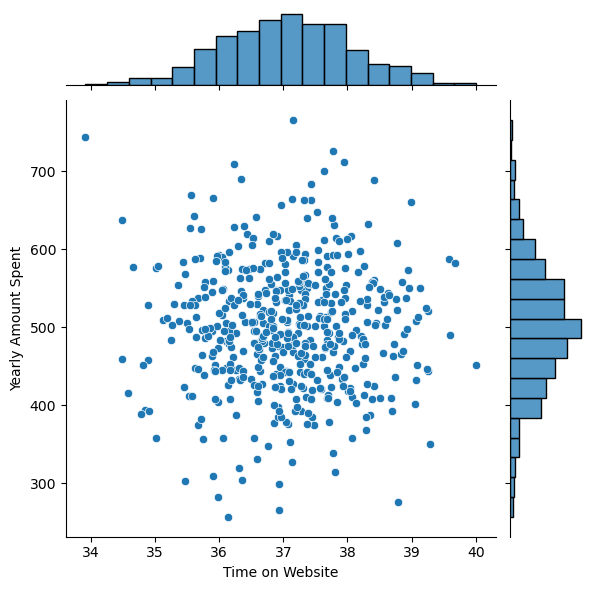

In [165]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data = data)

There may be somehwat of a coorelation here but it is not immediately obvious. Let's try something else.

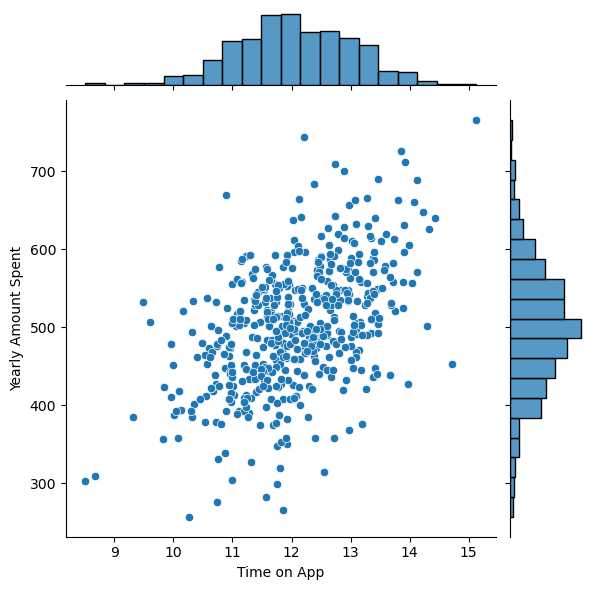

In [166]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=data)

A (linear) correlation here is a bit more visibly obvious. Let's explore this further.

<AxesSubplot: >

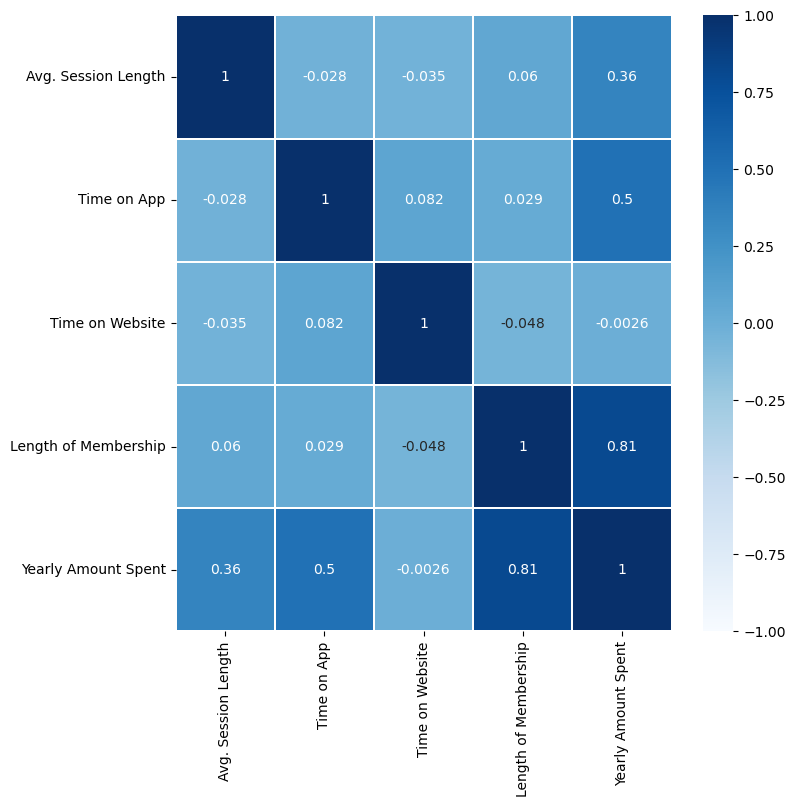

In [167]:
correlation = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, vmin=-1, cmap="Blues",
            annot=True, linewidth=0.1)

 As you can see, 'Length of membership has a strong correlation with 'Yearly Amount Spent' (81%)

Below is a visualization of various relationships between datapoints

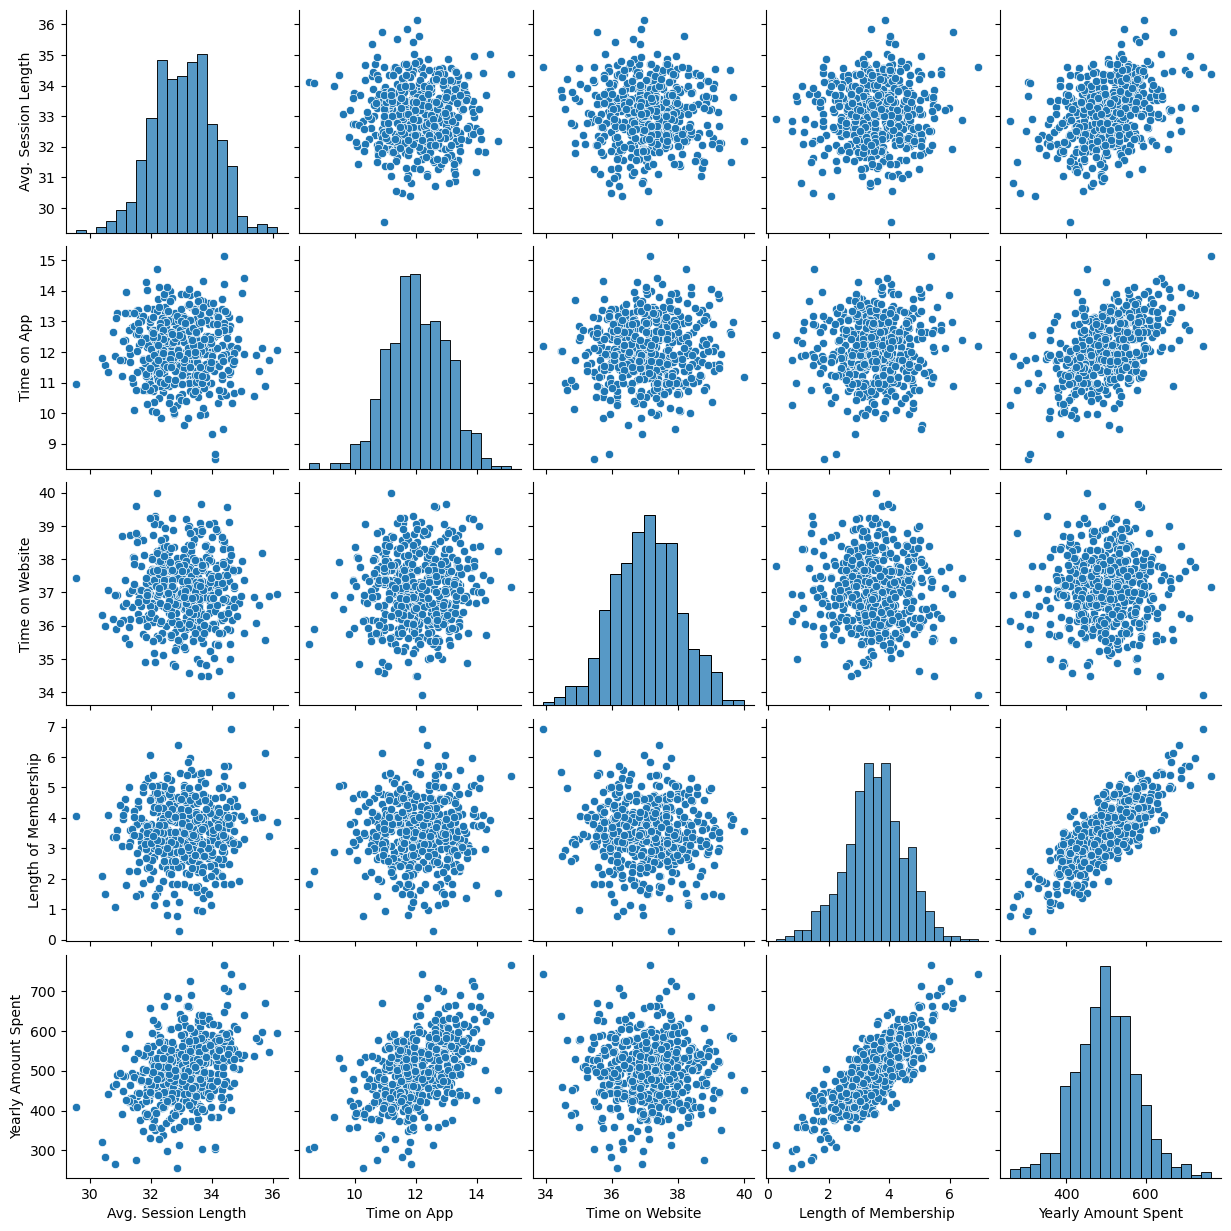

In [168]:
sns.pairplot(data)

As you can see, there is a clear linear trend (correlation) between 'Length of Membership' and 'Yearly Amount Spent'

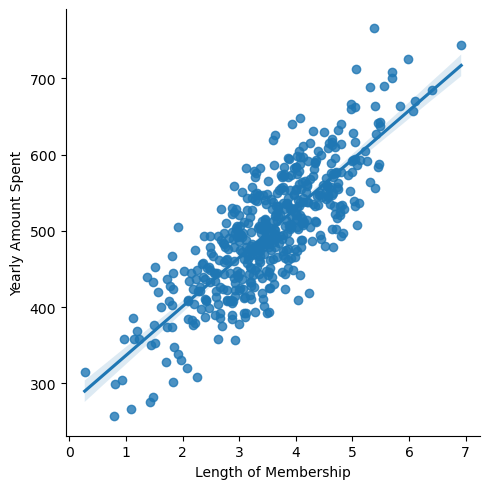

In [169]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data = data)

Now we can build a linear regression model based on this discovery

This model should give us the ability to predict 'Yearly Amount Spent'

In [170]:
x = data[['Length of Membership', 'Time on App', 'Time on Website', 'Avg. Session Length']]
y = data['Yearly Amount Spent']

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [172]:
print("Training data shape: ", x_train.shape)

Training data shape:  (350, 4)


In [173]:
print("Testing data shpae: ", x_test.shape)

Testing data shpae:  (150, 4)


Building the Machine Learning model:

In [174]:
x_train = sm.add_constant(x_train)
results = sm.OLS(y_train, x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5825.
Date:                 Tue, 11 Oct 2022   Prob (F-statistic):          3.46e-315
Time:                         11:46:26   Log-Likelihood:                -1296.2
No. Observations:                  350   AIC:                             2602.
Df Residuals:                      345   BIC:                             2622.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1050.6537     26.458    -39.710      0.000   -1102.694    -998.614
Length of Membership    61.6747      0.516    119.540      0.000      60.660      62.690
Time on App             38.5971      0.528     73.045      0.000      37.558      39.636
Time on Website          0.4591      0.520      0.884      0.377      -0.563       1.481
Avg. Session Length     25.7243      0.534     48.137      0.000      24.673      26.775
==============================================================================
Omnibus:                        1.523   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                1.262
Skew:                          -0.108   Prob(JB):                        0.532
Kurtosis:                       3.199   Cond. No.                     2.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This is insightful. Now let's build another model which focuses on 'Time on Website'

In [175]:
x_2 = data[['Length of Membership', 'Time on App', 'Avg. Session Length']]
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y, test_size = 0.3, random_state = 42)

In [176]:
print('Training data shape for x_2: ', x_2_train.shape)

Training data shape for x_2:  (350, 3)


In [177]:
print('Testing data shape: ', x_2_test.shape)

Testing data shape:  (150, 3)


In [178]:
x_2_train = sm.add_constant(x_2_train)
results_2 = sm.OLS(y_2_train, x_2_train).fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     7771.
Date:                 Tue, 11 Oct 2022   Prob (F-statistic):          5.34e-317
Time:                         11:46:26   Log-Likelihood:                -1296.6
No. Observations:                  350   AIC:                             2601.
Df Residuals:                      346   BIC:                             2617.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1034.1768     18.768    -55.104      0.000   -1071.090    -997.264
Length of Membership    61.6577      0.515    119.628      0.000      60.644      62.671
Time on App             38.6275      0.527     73.281      0.000      37.591      39.664
Avg. Session Length     25.7304      0.534     48.168      0.000      24.680      26.781
==============================================================================
Omnibus:                        1.489   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.475   Jarque-Bera (JB):                1.230
Skew:                          -0.113   Prob(JB):                        0.541
Kurtosis:                       3.183   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

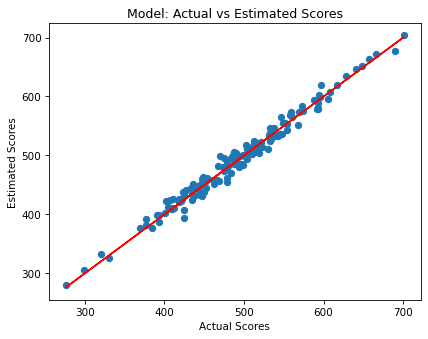

In [179]:
x_2_test = sm.add_constant(x_2_test)
y_2_preds = results_2.predict(x_2_test)

plt.figure(dpi = 75)
plt.scatter(y_2_test, y_2_preds)
plt.plot(y_2_test,y_2_test, color='red')
plt.xlabel('Actual Scores')
plt.ylabel('Estimated Scores')
plt.title('Model: Actual vs Estimated Scores')
plt.show()

Error evaluation of the model

In [180]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_2_test,y_2_preds))
print('MSE :'," ", metrics.mean_squared_error(y_2_test,y_2_preds))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_2_test,y_2_preds)))

MAE :   8.43116021262048
MSE :   103.97458501428268
RMAE :   10.196792878855717


<AxesSubplot: ylabel='Density'>

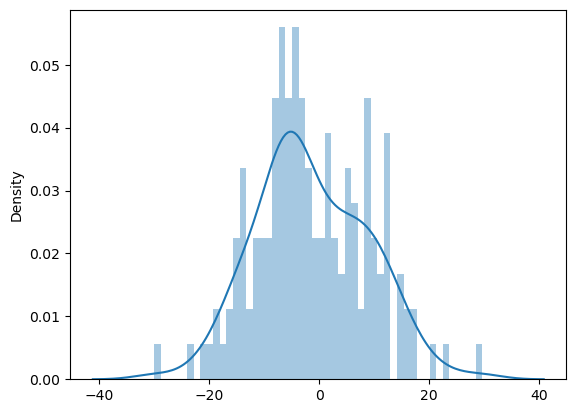

In [181]:
sns.distplot(y_2_test - y_2_preds, bins=50)

<AxesSubplot: xlabel='Time on App', ylabel='Yearly Amount Spent'>

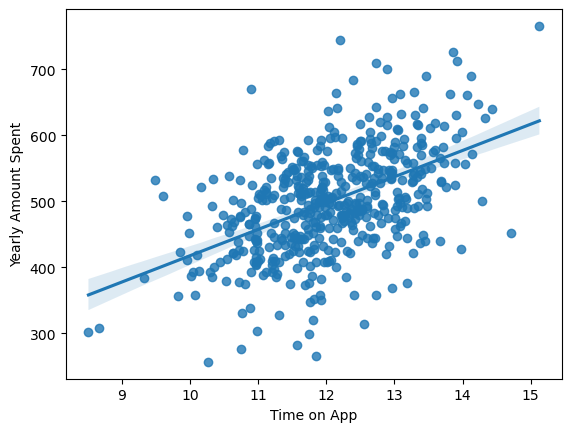

In [182]:
sns.regplot(data=data, x= 'Time on App', y= 'Yearly Amount Spent')

<AxesSubplot: xlabel='Time on Website', ylabel='Yearly Amount Spent'>

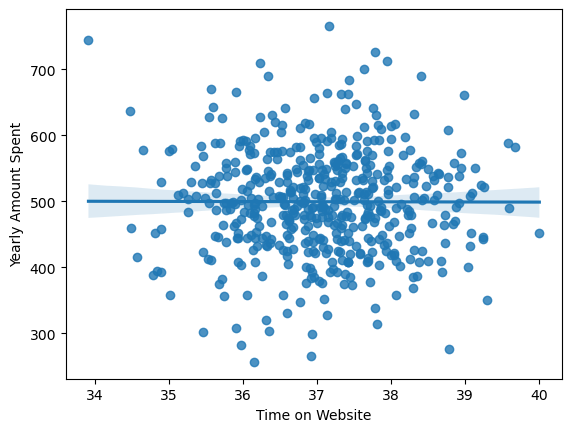

In [183]:
sns.regplot(data=data, x= 'Time on Website', y='Yearly Amount Spent')

As you can see here, increasing a user's time spent on the website does not quite correlate to the user (annual) spending amount.

This can be interpreted in a number of ways from the perspective of Business Intelligence:
* It could imply that the website needs some work 
* It could also imply that the website does not warrant the deployment of business resources at this time, and that continuing to increase a user's time spent on the App is more important and ultimately more valuable to the business

In [184]:
#sns.regplot(data=data, x=userInput2, y='Yearly Amount Spent')

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [186]:
data['Avg. Session Length'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: Avg. Session Length
Non-Null Count  Dtype  
--------------  -----  
500 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


<AxesSubplot: xlabel='Yearly Amount Spent', ylabel='Count'>

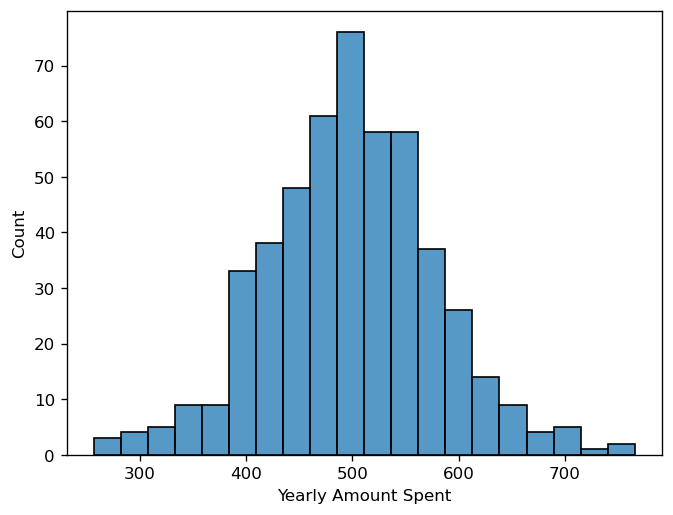

In [187]:
plt.figure(dpi = 120)
sns.histplot(data = data, x = 'Yearly Amount Spent',palette='BuPu')

In [188]:
def plot_histogram(bins = 20, kde = False, palette = 'Blues', x_range_1 = (1,1000)): 
    """plots histogram
    params:
    =======
    bins: int
        histogram bins
    hue: str
        categorical columns to color 
    kde: bool 
        wether to show kde plot 
    palette: str
        palette of histogram
    x_range_1: tuple(int,int)
        x range of the plot 
    returns:
        histogram
    """
    plt.figure(dpi = 150)
    sns.histplot(data = data, 
                        x = 'Yearly Amount Spent',
                        palette=palette, 
                        bins = bins, 
                        kde = kde,
                 
                        
                       )
    plt.xlim(x_range_1)

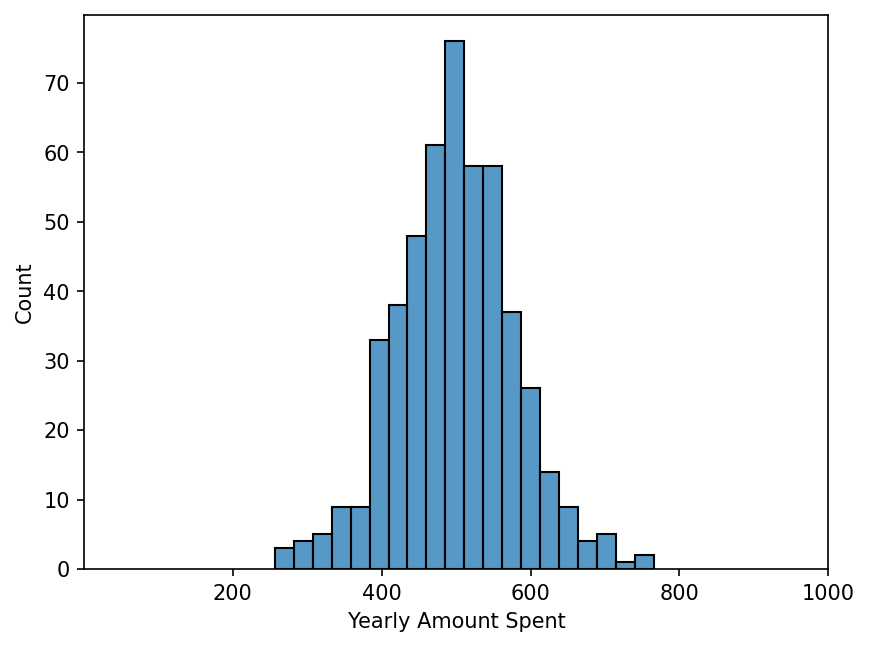

In [189]:
plot_histogram()

In [190]:
# This interactive graph allows users to visualize the distribution of 'Yearly Amount Spent' from various perspectives

In [191]:
_ = interact(plot_histogram,
         bins = widgets.IntSlider(
             value = 10,
             min = 1,
             max = 1000,
             step = 10
         )
        )

interactive(children=(IntSlider(value=10, description='bins', max=1000, min=1, step=10), Checkbox(value=False,…